In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.DataFrame(pd.read_csv("train.csv"))

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df = df.drop(["Row ID", "Order ID", "Customer ID" , "Customer Name" , "Postal Code" , "Product ID" , "Category" , "Sub-Category" , "Product Name"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9800 non-null   object 
 1   Ship Date   9800 non-null   object 
 2   Ship Mode   9800 non-null   object 
 3   Segment     9800 non-null   object 
 4   Country     9800 non-null   object 
 5   City        9800 non-null   object 
 6   State       9800 non-null   object 
 7   Region      9800 non-null   object 
 8   Sales       9800 non-null   float64
dtypes: float64(1), object(8)
memory usage: 689.2+ KB


convert date

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors="coerce")


In [ ]:

df["Order_Year"] = df["Order Date"].dt.year
df["Order_Month"] = df["Order Date"].dt.month
df["Order_Day"] = df["Order Date"].dt.day


**SHip data converted**

In [ ]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True, errors="coerce")

In [ ]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Ship_Year"] = df["Ship Date"].dt.year
df["Ship_Month"] = df["Ship Date"].dt.month
df["Ship_Day"] = df["Ship Date"].dt.day


**One-hoe-encoding**

In [ ]:
df = pd.get_dummies(df, columns=["Ship Mode"], drop_first=True)



In [ ]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
df['Segment'] = df['Segment'].replace({'Consumer': 0, 'Corporate': 1, 'Home Office': 2})

/tmp/ipython-input-348509161.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Segment'] = df['Segment'].replace({'Consumer': 0, 'Corporate': 1, 'Home Office': 2})


In [ ]:
df = df.drop("Country", axis=1)


In [ ]:
le = LabelEncoder()
df["City"] = le.fit_transform(df["City"])


In [ ]:
le = LabelEncoder()
df["State"] = le.fit_transform(df["State"])


In [ ]:
df['Region'] = df["Region"].replace({'Central': 0, 'South': 1, 'East': 2, 'West': 3})

/tmp/ipython-input-4020334466.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Region'] = df["Region"].replace({'Central': 0, 'South': 1, 'East': 2, 'West': 3})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order Date                9800 non-null   datetime64[ns]
 1   Ship Date                 9800 non-null   datetime64[ns]
 2   Segment                   9800 non-null   int64         
 3   City                      9800 non-null   int64         
 4   State                     9800 non-null   int64         
 5   Region                    9800 non-null   int64         
 6   Sales                     9800 non-null   float64       
 7   Order_Year                9800 non-null   int32         
 8   Order_Month               9800 non-null   int32         
 9   Order_Day                 9800 non-null   int32         
 10  Ship_Year                 9800 non-null   int32         
 11  Ship_Month                9800 non-null   int32         
 12  Ship_Day            

In [ ]:

df = pd.get_dummies(df, columns=["Segment", "Region"], drop_first=True)


df["Ship Mode_Same Day"] = df["Ship Mode_Same Day"].astype(int)
df["Ship Mode_Second Class"] = df["Ship Mode_Second Class"].astype(int)
df["Ship Mode_Standard Class"] = df["Ship Mode_Standard Class"].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order Date                9800 non-null   datetime64[ns]
 1   Ship Date                 9800 non-null   datetime64[ns]
 2   City                      9800 non-null   int64         
 3   State                     9800 non-null   int64         
 4   Sales                     9800 non-null   float64       
 5   Order_Year                9800 non-null   int32         
 6   Order_Month               9800 non-null   int32         
 7   Order_Day                 9800 non-null   int32         
 8   Ship_Year                 9800 non-null   int32         
 9   Ship_Month                9800 non-null   int32         
 10  Ship_Day                  9800 non-null   int32         
 11  Ship Mode_Same Day        9800 non-null   int64         
 12  Ship Mode_Second Cla

In [ ]:
import pandas as pd
from prophet import Prophet


df_prophet = df[['Order Date', 'Sales']].copy()
df_prophet.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)


df_monthly = df_prophet.groupby(pd.Grouper(key='ds', freq='M')).sum().reset_index()


model = Prophet()
model.fit(df_monthly)


future = model.make_future_dataframe(periods=1, freq='ME')


forecast = model.predict(future)

df_monthly = df_prophet.groupby(pd.Grouper(key='ds', freq='ME')).sum().reset_index()
future = model.make_future_dataframe(periods=1, freq='ME')



next_month_sale = forecast[['ds', 'yhat']].tail(1)
print(next_month_sale)


/tmp/ipython-input-593674553.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_prophet.groupby(pd.Grouper(key='ds', freq='M')).sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ssezlk8/z4wse4d8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ssezlk8/_cvxwdzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62295', 'data', 'file=/tmp/tmp6ssezlk8/z4wse4d8.json', 'init=/tmp/tmp6ssezlk8/_cvxwdzt.json', 'output', 'file=/tmp/tmp6ssezlk8/prophet_modelp2nkd8k7/prophet_model-20250908102506.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:25:06 - cmds

           ds          yhat
48 2019-01-31  42990.568527


In [ ]:
from prophet import Prophet


model = Prophet()
model.fit(df_prophet)


future = model.make_future_dataframe(periods=81, freq='ME')
forecast = model.predict(future)


forecast_date = forecast[forecast['ds'] == '2025-09-30']
print(forecast_date[['ds', 'yhat']])


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ssezlk8/fyge2x0c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ssezlk8/8lmo4gms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21495', 'data', 'file=/tmp/tmp6ssezlk8/fyge2x0c.json', 'init=/tmp/tmp6ssezlk8/8lmo4gms.json', 'output', 'file=/tmp/tmp6ssezlk8/prophet_model5p4jjhdv/prophet_model-20250908102807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Empty DataFrame
Columns: [ds, yhat]
Index: []


In [ ]:
df.tail()

,Order Date,Ship Date,City,State,Sales,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_1,Segment_2,Region_1,Region_2,Region_3
9795,2017-05-21,2017-05-28,80,11,3.798,2017,5,21,2017,5,28,0,0,1,True,False,False,False,False
9796,2016-01-12,2016-01-17,483,33,10.368,2016,1,12,2016,1,17,0,0,1,True,False,False,True,False
9797,2016-01-12,2016-01-17,483,33,235.188,2016,1,12,2016,1,17,0,0,1,True,False,False,True,False
9798,2016-01-12,2016-01-17,483,33,26.376,2016,1,12,2016,1,17,0,0,1,True,False,False,True,False
9799,2016-01-12,2016-01-17,483,33,10.384,2016,1,12,2016,1,17,0,0,1,True,False,False,True,False


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ssezlk8/zh6wup36.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ssezlk8/oetze_yi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59143', 'data', 'file=/tmp/tmp6ssezlk8/zh6wup36.json', 'init=/tmp/tmp6ssezlk8/oetze_yi.json', 'output', 'file=/tmp/tmp6ssezlk8/prophet_modelgxxfl4mt/prophet_model-20250908103953.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:39:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


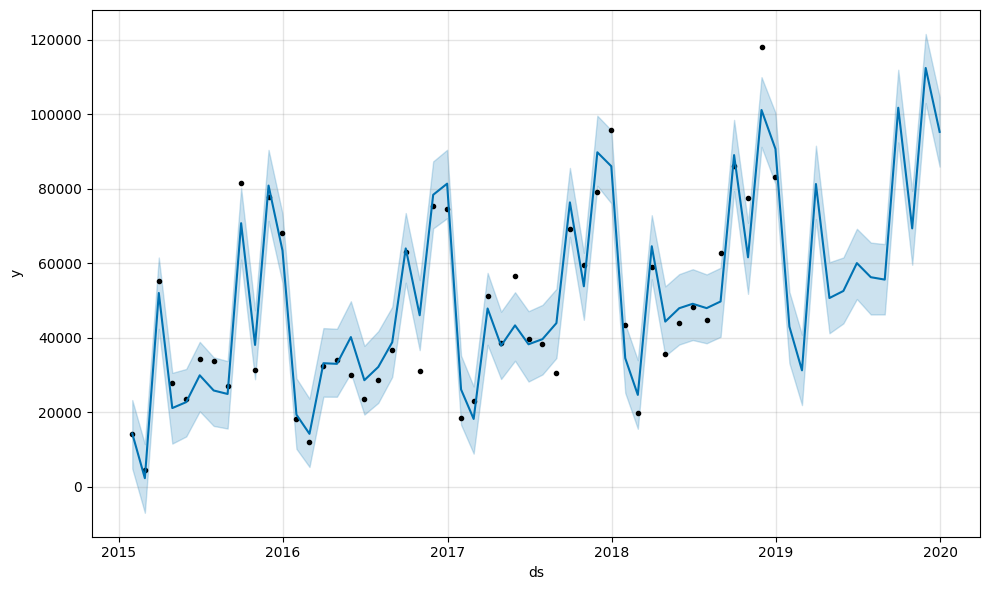

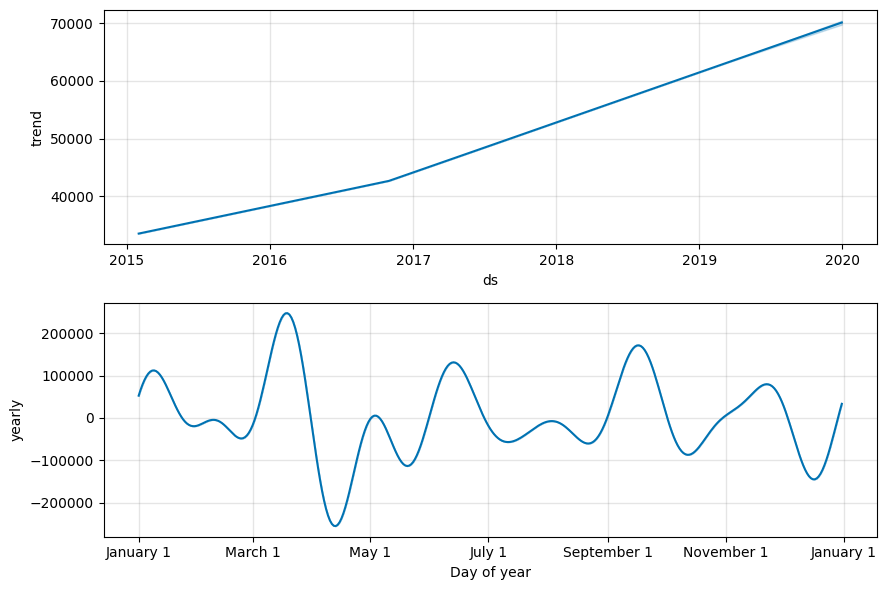

INFO:prophet:Making 21 forecasts with cutoffs between 2017-02-09 00:00:00 and 2018-10-02 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ssezlk8/1xcivlk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ssezlk8/4cde1135.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7', 'data', 'file=/tmp/tmp6ssezlk8/1xcivlk5.json', 'init=/tmp/tmp6ssezlk8/4cde1135.json', 'output', 'file=/tmp/tmp6ssezlk8/prophet_modelh5r2zich/prophet_model-20250908103954.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:39:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ssezlk8/kyrxqjdo.json
DEBUG:cmdstanpy:input tempfile: 

  horizon           mse          rmse          mae      mape     mdape  \
0 22 days  1.063387e+08  10312.064295  8420.356213  0.228264  0.191291   
1 23 days  1.190273e+08  10909.961990  9086.558571  0.213736  0.191291   
2 24 days  1.454462e+08  12060.106603  9871.115269  0.232349  0.184763   
3 25 days  1.524079e+08  12345.358831  9917.467286  0.181223  0.178383   
4 26 days  1.077065e+08  10378.172432  8321.509301  0.157234  0.128147   

      smape  coverage  
0  0.270571  0.166667  
1  0.203031  0.166667  
2  0.224563  0.333333  
3  0.192121  0.500000  
4  0.170570  0.500000  
MAPE (Mean Absolute % Error): 0.18778413584846027
Model Accuracy: 81.22158641515398 %


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics



df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors="coerce")


df_prophet = df[["Order Date", "Sales"]].rename(columns={"Order Date": "ds", "Sales": "y"})


df_monthly = df_prophet.groupby(pd.Grouper(key="ds", freq="ME")).sum().reset_index()


m = Prophet()
m.fit(df_monthly)


future = m.make_future_dataframe(periods=12, freq="ME")
forecast = m.predict(future)


fig1 = m.plot(forecast)
plt.show()

fig2 = m.plot_components(forecast)
plt.show()


df_cv = cross_validation(m, horizon="90 days", period="30 days", initial="730 days")
df_p = performance_metrics(df_cv)

print(df_p.head())
print("MAPE (Mean Absolute % Error):", df_p["mape"].mean())
print("Model Accuracy:", 100 - df_p["mape"].mean()*100, "%")


forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].to_csv("forecast_results.csv", index=False)
